In [1]:
# 随机梯度下降
%matplotlib inline
import math
import torch
from d2l import torch as d2l

In [2]:
def f(x1, x2): # ⽬标函数
    return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2): # ⽬标函数的梯度
    return 2 * x1, 4 * x2

epoch 50, x1: -0.092489, x2: -0.160659


/home/ubuntu/anaconda3/envs/d2l/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/home/ubuntu/anaconda3/envs/d2l/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484683044/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


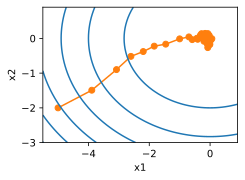

In [3]:
def sgd(x1, x2, s1, s2, f_grad): # 随机梯度下降
    g1, g2 = f_grad(x1, x2) # 计算梯度
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)) # 添加噪声
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0) # 更新
def constant_lr(): # 常数学习率
    return 1
eta = 0.1 # 步长
lr = constant_lr # 常数学习速度
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.770922, x2: -0.025643


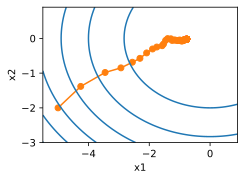

In [5]:
'''
正如我们所看到的，随机梯度下降中变量的轨迹⽐我们在 11.3节中观察到的梯度下降中观察到的轨迹嘈杂得
多。这是由于梯度的随机性质。也就是说，即使我们接近最⼩值，我们仍然受到通过η∇fi(x)的瞬间梯度所注
⼊的不确定性的影响。即使经过50次迭代，质量仍然不那么好。更糟糕的是，经过额外的步骤，它不会得到
改善（我们⿎励你尝试更多的步骤来确认这⼀点）。这给我们留下了唯⼀的选择：改变学习率η。但是，如果
我们选择的学习率太⼩，我们⼀开始就不会取得任何有意义的进展。另⼀⽅⾯，如果我们选择的学习率太⼤，
我们将⽆法获得⼀个好的解决⽅案，如上所⽰。解决这些相互冲突的⽬标的唯⼀⽅法是在优化过程中动态降
低学习率。
这也是在sgd步⻓函数中添加学习率函数lr的原因。在上⾯的⽰例中，学习率调度的任何功能都处于休眠状
态，因为我们将相关的lr函数设置为常量
---------------------------------------------------------------------------------------
# 动态学习率
⽤与时间相关的学习率η(t)取代η增加了控制优化算法收敛的复杂性。特别是，我们需要弄清η的衰减速度。
如果太快，我们将过早停⽌优化。如果减少的太慢，我们会在优化上浪费太多时间。以下是随着时间推移调
整η时使⽤的⼀些基本策略（稍后我们将讨论更⾼级的策略）：
η(t) = ηi if ti ≤ t ≤ ti+1 分段常数
η(t) = η0 · e−λt 指数衰减
η(t) = η0 · (βt + 1)−α 多项式衰减
在第⼀个分段常数（piecewise constant）场景中，我们会降低学习率，例如，每当优化进度停顿时。这是训
练深度⽹络的常⻅策略。或者，我们可以通过指数衰减（exponential decay）来更积极地减低它。不幸的是，
这往往会导致算法收敛之前过早停⽌。⼀个受欢迎的选择是α = 0.5的多项式衰减（polynomial decay）。在
凸优化的情况下，有许多证据表明这种速率表现良好。
让我们看看指数衰减在实践中是什么样⼦
'''
def exponential_lr():
    # 在函数外部定义，⽽在内部更新的全局变量
    global t
    t += 1
    return math.exp(-0.1 * t) # 指数衰减
t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))


epoch 50, x1: 0.056219, x2: 0.025488


/home/ubuntu/anaconda3/envs/d2l/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


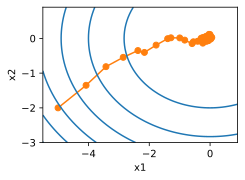

In [6]:
'''
正如预期的那样，参数的⽅差⼤⼤减少。但是，这是以未能收敛到最优解x = (0, 0)为代价的。即使经过1000个
迭代步骤，我们仍然离最优解很远。事实上，该算法根本⽆法收敛。另⼀⽅⾯，如果我们使⽤多项式衰减，其
中学习率随迭代次数的平⽅根倒数衰减，那么仅在50次迭代之后，收敛就会更好
'''
def polynomial_lr():
    # 在函数外部定义，⽽在内部更新的全局变量
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5) # 多项式衰减
t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

In [ ]:
'''
关于如何设置学习率，还有更多的选择。例如，我们可以从较⼩的学习率开始，然后使其迅速上涨，再让它
降低，尽管这会更慢。我们甚⾄可以在较⼩和较⼤的学习率之间切换。现在，让我们专注于可以进⾏全⾯理
论分析的学习率计划，即凸环境下的学习率。对⼀般的⾮凸问题，很难获得有意义的收敛保证，因为总的来
说，最⼤限度地减少⾮线性⾮凸问题是NP困难的。有关的研究调查，请参阅例如2015年Tibshirani的优秀讲
义笔记
PS:重复采⽤训练数据集的时候，会以不同的随机顺序遍历它
----------------------------------------------------------------------------------------
⼩结
• 对于凸问题，我们可以证明，对于⼴泛的学习率选择，随机梯度下降将收敛到最优解。
• 对于深度学习⽽⾔，情况通常并⾮如此。但是，对凸问题的分析使我们能够深⼊了解如何进⾏优化，即
逐步降低学习率，尽管不是太快。
• 如果学习率太⼩或太⼤，就会出现问题。实际上，通常只有经过多次实验后才能找到合适的学习率。
• 当训练数据集中有更多样本时，计算梯度下降的每次迭代的代价更⾼，因此在这些情况下，⾸选随机梯
度下降。
• 随机梯度下降的最优性保证在⾮凸情况下⼀般不可⽤，因为需要检查的局部最⼩值的数量可能是指数
级的。
'''


